In [34]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [36]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [37]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [38]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_numeric = df_market_data.select_dtypes(include=['float64', 'int64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numeric data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

In [39]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

# Copy the crypto names from the original data
df_scaled['crypto_name'] = df_market_data.index

# Set the coin_id column as the index
df_scaled.set_index('crypto_name', inplace=True)

# Display sample data
print(df_scaled.head(10))

df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

                 price_change_percentage_24h  price_change_percentage_7d  \
crypto_name                                                                
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
crypto_nam

---

### Find the Best Value for k Using the Original Data.

In [40]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [41]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_data_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
display(inertia_values)

[287.0,
 198.57181809798124,
 145.63574772192862,
 79.02243535120975,
 66.21778006000339,
 59.13907002537008,
 48.406314490413614,
 38.99358798927969,
 34.40059545400235,
 28.573602560967856,
 23.890044355377952]

In [42]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_value': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)


    k_value     inertia
0         1  287.000000
1         2  198.571818
2         3  145.635748
3         4   79.022435
4         5   66.217780
5         6   59.139070
6         7   48.406314
7         8   38.993588
8         9   34.400595
9        10   28.573603
10       11   23.890044


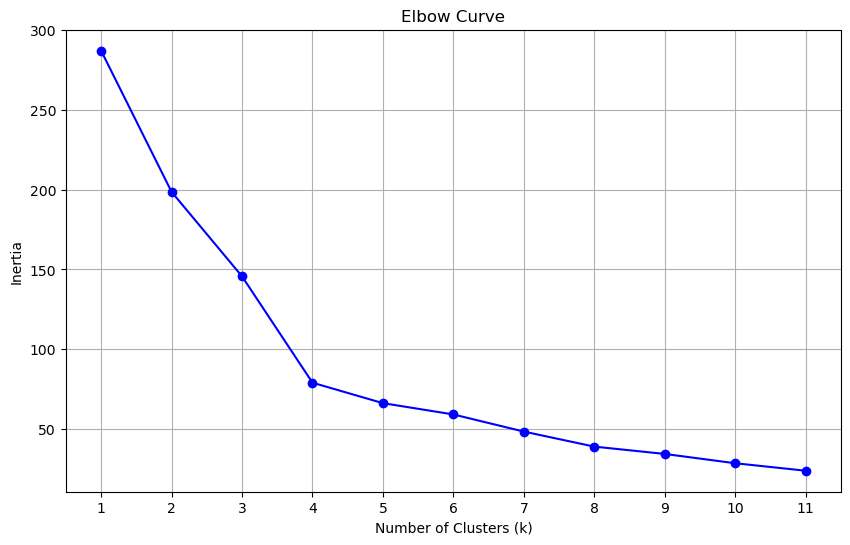

In [43]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_value'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(df_elbow['k_value'])  # Show all k values on x-axis
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [44]:
best_k = 4 
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [45]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=0)

In [46]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_market_data_scaled)
df_market_data['cluster'] = cluster_labels
# Print the resulting array of cluster values.
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [47]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()
df_market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [48]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['cluster'] = cluster_labels

# Display sample data
df_market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [49]:
# Create a scatter plot using hvPlot by setting 
scatter_plot = df_market_data_copy.hvplot.scatter(
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
     x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
# Color the graph points with the labels found using K-Means and 
     c="cluster",  # Color the points by cluster label
# add the crypto name in the `hover_cols` parameter to identify 
    hover_cols=["coin_id"],  # Add crypto name to hover information
# the cryptocurrency represented by each data point.
title="Cryptocurrency Price Change Scatter Plot",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    width=800,
    height=600,
    cmap='Category10'  # Optional: use a specific color map for clusters
)

# Display the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [50]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [51]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca.fit(df_market_data_scaled)
# View the first five rows of the DataFrame. 


PCA(n_components=3)

In [52]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
# Print the explained variance
print("Explained Variance Ratio for each Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f}")

Explained Variance Ratio for each Principal Component:
Principal Component 1: 0.3720
Principal Component 2: 0.3470
Principal Component 3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

0.8950

In [53]:
# Create a new DataFrame with the PCA data
pca_data = pca.transform(df_market_data_scaled)

# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_pca['crypto_name'] = df_market_data.index

# Set the coinid column as index
df_pca.set_index(df_market_data.index, inplace=True)

# Display sample data
df_pca.head()

,PC1,PC2,PC3,crypto_name
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin
ethereum,-0.458261,0.458466,0.952877,ethereum
tether,-0.433070,-0.168126,-0.641752,tether
ripple,-0.471835,-0.222660,-0.479053,ripple
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [54]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [55]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a list with k-values from 1 to 11
k_values = list(range(1, 12))

# Loop through each value of k
for k in k_values:
    # Create a KMeans model with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA-transformed data
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values
print(inertia_values)

[256.87408556789245, 182.33953007775636, 140.4318329840836, 49.66549665179737, 42.051901097917245, 31.74900524438903, 28.03186917255276, 19.451747206041365, 13.814081971558112, 10.63064757387098, 10.12024262995777]


In [56]:
# Create a dictionary with k-values and corresponding inertia values
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame from the dictionary
df_elbow = pd.DataFrame(elbow_data)


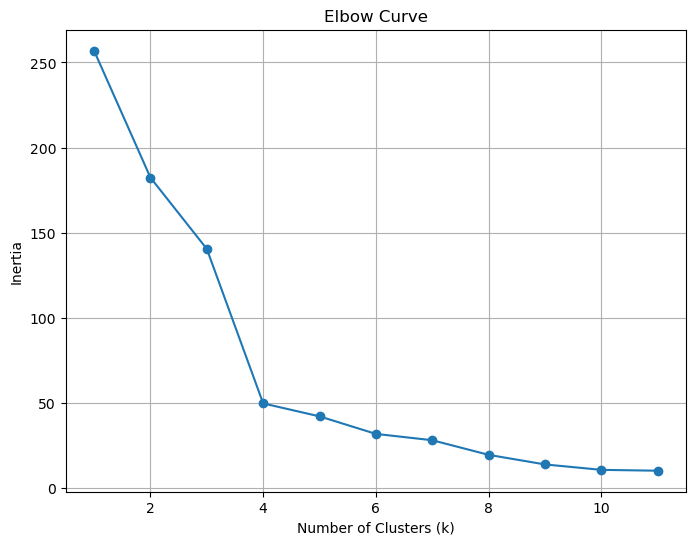

In [57]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [58]:
# Initialize the K-Means model using the best value for k
optimal_k = 4 
kmeans_best = KMeans(n_clusters=optimal_k, random_state=42)

In [59]:
# Fit the K-Means model using the PCA data
kmeans_best = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_best.fit(df_pca[['PC1', 'PC2', 'PC3']])

KMeans(n_clusters=4, random_state=42)

In [60]:
# Predict the clusters for the PCA-transformed data
cluster_predictions = kmeans_best.predict(df_pca[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values
print(cluster_predictions)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [61]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = cluster_predictions

# Display sample data
display(df_pca_copy.head())

,PC1,PC2,PC3,crypto_name,cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin,0
ethereum,-0.458261,0.458466,0.952877,ethereum,0
tether,-0.433070,-0.168126,-0.641752,tether,2
ripple,-0.471835,-0.222660,-0.479053,ripple,2
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash,0


In [62]:
# Create a scatter plot using hvPlot by setting 
scatter_plot = df_pca_copy.hvplot.scatter(
# `x="PC1"` and `y="PC2"`. 
    x='PC1', 
    y='PC2', 
# Color the graph points with the labels found using K-Means and 
    c='cluster',          
    cmap='viridis',        
# add the crypto name in the `hover_cols` parameter to identify 
    hover_cols=['crypto_name'], # Display crypto names on hover
    title='PCA Scatter Plot with Clusters',
# the cryptocurrency represented by each data point.
    width=800,                 # Set the width of the plot
    height=600                 # Set the height of the plot
)
scatter_plot

:Scatter   [PC1]   (PC2,cluster,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [63]:
# Create composite plot
# Define k values
k_values = list(range(1, 12))

# Initialize an empty list to store inertia values
inertia_values_method1 = []

# Compute inertia values for Method 1
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    inertia_values_method1.append(kmeans.inertia_)
    # Initialize an empty list to store inertia values for Method 2

inertia_values_method2 = []

# Compute inertia values for Method 2 (could be different parameters or another method)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=24)  # Different random_state or other parameters
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    inertia_values_method2.append(kmeans.inertia_)

elbow_data_method1 = {'k': k_values, 'inertia': inertia_values_method1}
elbow_data_method2 = {'k': k_values, 'inertia': inertia_values_method2}

df_elbow_method1 = pd.DataFrame(elbow_data_method1)
df_elbow_method2 = pd.DataFrame(elbow_data_method2)

composite_plot = (
    df_elbow_method1.hvplot.line(
        x='k', 
        y='inertia', 
        label='Method 1',
        color='blue'
    ) * 
    df_elbow_method2.hvplot.line(
        x='k', 
        y='inertia', 
        label='Method 2',
        color='red'
    )
).opts(
    title='Comparison of Elbow Curves',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=600,
    show_legend=True
)

# Display the composite plot
composite_plot

:Overlay
   .Curve.Method_1 :Curve   [k]   (inertia)
   .Curve.Method_2 :Curve   [k]   (inertia)

In [67]:
# Check if cluster labels are defined
if 'cluster_labels_method1' not in globals() or 'cluster_labels_method2' not in globals():
    from sklearn.cluster import KMeans

    # Define the number of clusters used in the previous methods
    optimal_k_method1 = 4
    optimal_k_method2 = 4 

    # Initialize KMeans models with the optimal k values
    kmeans_method1 = KMeans(n_clusters=optimal_k_method1, random_state=42)
    kmeans_method2 = KMeans(n_clusters=optimal_k_method2, random_state=24)

    # Fit the KMeans models to the PCA-transformed data and predict the clusters
    cluster_labels_method1 = kmeans_method1.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])
    cluster_labels_method2 = kmeans_method2.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

# Create composite plot 
composite_plot = (
    df_pca.hvplot.scatter(
        x='PC1', 
        y='PC2', 
        c=cluster_labels_method1,   # Use Method 1 cluster labels
        cmap='viridis',             # Color map for clusters (Method 1)
        label='Method 1',
        hover_cols=['crypto_name']  # Show crypto names on hover
    ) * 
    df_pca.hvplot.scatter(
        x='PC1', 
        y='PC2', 
        c=cluster_labels_method2,   # Use Method 2 cluster labels
        cmap='plasma',              # Different color map for contrast (Method 2)
        label='Method 2',
        hover_cols=['crypto_name']  # Show crypto names on hover
    )
).opts(
    title='Comparison of Clustering Results',
    xlabel='PC1',
    ylabel='PC2',
    width=800,
    height=600,
    show_legend=True
)

# Display the composite plot
composite_plot



:Overlay
   .Scatter.Method_1 :Scatter   [PC1]   (PC2,_color,crypto_name)
   .Scatter.Method_2 :Scatter   [PC1]   (PC2,_color,crypto_name)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster the data with K-Mseans simplifies the analysis but this may also reduce the accuracy of the clusters. It could lead to less distinct groupings, making it harder to capture all the nuances in the data.